# Analyis of global temperature

In this example we show some analysis of global surface temperature fields. The data which is used is the NCEP reanalysis data which we first download.

In [1]:
%matplotlib inline
import os

from pycmbs.data import Data
from pycmbs.mapping import map_plot

# we download some NCEP data
if not os.path.exists('air.mon.mean.nc'):
    !wget --ftp-user=anonymous --ftp-password=nothing ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc
ncep = Data('air.mon.mean.nc', 'air', read=True, label='NCEP air')        

/usr/local/lib/python2.7/dist-packages/matplotlib-1.3.1-py2.7-linux-x86_64.egg/matplotlib/__init__.py:1155: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## EOF analysis of NCEP temperature field

As we might be interested in the characteristics spatiotemporal pattern of the air temperature field we perform an EOF analysis. This is done using the EOF object.

In [2]:
from pycmbs.diagnostic import EOF
E = EOF(ncep, anomalies=True)

*** EOF ANALYSIS ***
   EOF analysis with 810 timesteps and 10512 grid cells ...


We now plot the resulting patterns for the first 4 EOF's and also their temporal evolution.

INFO: The backend has been automatically switched to CARTOPY as this provides higher quality and faster plotting on your machine
INFO: The backend has been automatically switched to CARTOPY as this provides higher quality and faster plotting on your machine
INFO: The backend has been automatically switched to CARTOPY as this provides higher quality and faster plotting on your machine
INFO: The backend has been automatically switched to CARTOPY as this provides higher quality and faster plotting on your machine


/usr/local/lib/python2.7/dist-packages/cartopy/crs.py:1211: UserWarning: The Robinson projection in the v4.8.x series of Proj.4 contains a discontinuity at 40 deg latitude. Use this projection with caution.
  warnings.warn('The Robinson projection in the v4.8.x series '


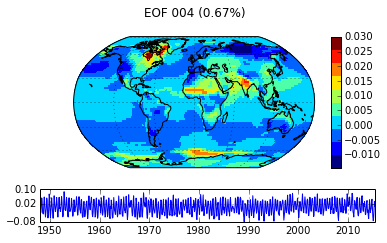

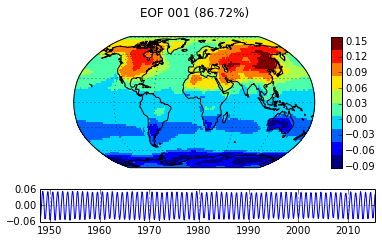

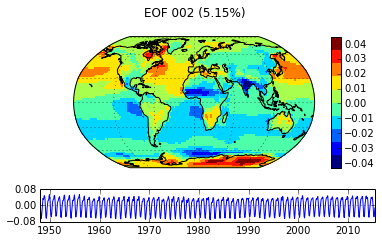

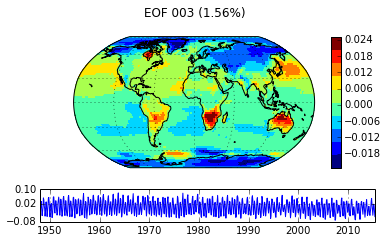

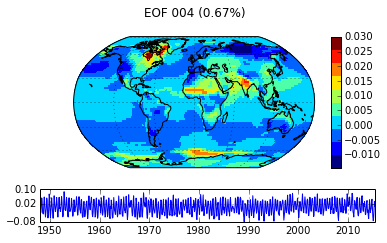

In [8]:
E.plot_EOF([0,1,2,3],use_basemap=True,show_coef=True)

## Let's now have a look on the global mean temperature and it's anomalies

* We use LinePlot for this which automatically performs an area weighted mean calculation.
* in addition we also estimate the longterm linear trend and plot it's slope as a map

Calculating correlation ...
INFO: The backend has been automatically switched to CARTOPY as this provides higher quality and faster plotting on your machine
INFO: The backend has been automatically switched to CARTOPY as this provides higher quality and faster plotting on your machine


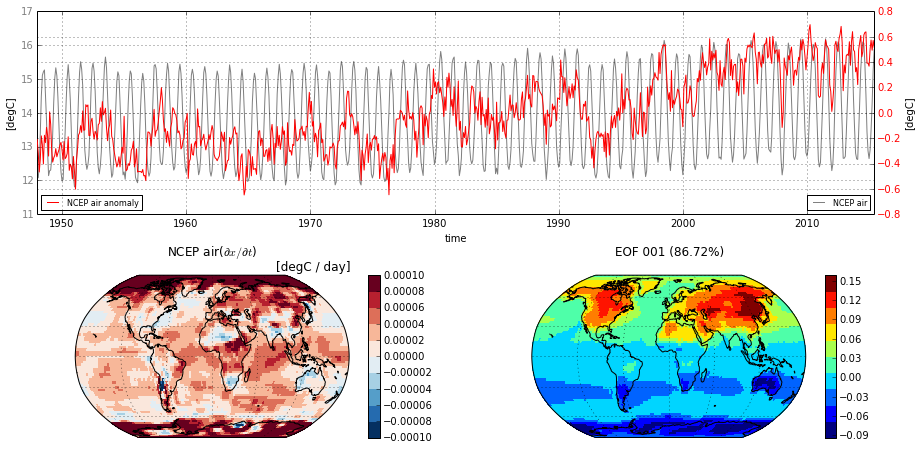

In [10]:
from pycmbs.plots import LinePlot
import matplotlib.pyplot as plt
f = plt.figure(figsize=(15,8))
ax1 = f.add_subplot(2,1,1)
#ax2 = f.add_subplot(2,1,2)
ax2 = ax1.twinx()
ax3 = f.add_subplot(2,2,3)
ax4 = f.add_subplot(2,2,4)

L = LinePlot(ax=ax1)
L.plot(ncep, color='grey')
L.ax.grid()
L.legend(loc='lower right')

L1 = LinePlot(ax=ax2)
L1.plot(ncep.get_deseasonalized_anomaly(base='all'), color='red')  # calculate anomalies on the fly
L1.ax.grid()
L1.legend(loc='lower left')

# calculate longterm trend
R, S, I, P = ncep.temporal_trend(return_object=True) #, pthres=0.05)
f = map_plot(S, cmap_data = 'RdBu_r', vmin=-0.0001, vmax=0.0001, use_basemap=True, ax=ax3)

# we plot EOF in addition
E.plot_EOF([0], use_basemap=True, ax=ax4)



In [10]:
f.savefig('../temperature_trend.pdf', bbox_inches='tight')

/usr/local/lib/python2.7/dist-packages/matplotlib-1.3.1-py2.7-linux-x86_64.egg/matplotlib/backends/backend_pdf.py:2184: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  different = bool(ours != theirs)
